In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
dfc = pd.read_csv("C:/Users/drash/OneDrive/Desktop/PythonSQL/Covid19.csv")

df1 = pd.read_csv("C:/Users/drash/OneDrive/Desktop/PythonSQL/Covid19.csv")


dfc

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,21-05-2020 02:32,32.3182,-86.9023,13052,522,NaN,12530,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,21-05-2020 02:32,61.3707,-152.4044,401,10,352.0,39,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,21-05-2020 02:32,-14.2710,-170.1320,0,0,NaN,0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,21-05-2020 02:32,33.7298,-111.4312,14906,747,3773.0,10386,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,21-05-2020 02:32,34.9697,-92.3731,5003,107,3852.0,1044,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,21-05-2020 02:32,36.1162,-119.6816,85997,3497,NaN,82500,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,21-05-2020 02:32,39.0598,-105.3111,22797,1299,3478.0,18020,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,21-05-2020 02:32,41.5978,-72.7554,39017,3529,6264.0,29224,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,21-05-2020 02:32,39.3185,-75.5071,8194,310,3965.0,3919,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,21-05-2020 02:32,NaN,NaN,49,0,NaN,49,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [4]:
dfc.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

# Dropping Columns

In [5]:
dfc.Last_Update.value_counts()

21-05-2020 02:32    58
Name: Last_Update, dtype: int64

In [6]:
dfc.Country_Region.value_counts()

US    58
Name: Country_Region, dtype: int64

We Shall be dropping below columns as they are either having repeated information or are irrelevent - 
1.Country_Region - Single value US
2. Lat & Loong_ - Not required since we have state names
3. UID - Unique identifier for rows
4. ISO3 - Officialy assigned country code identifiers
5. FIPS - Federal Information Processing Standards code that uniquely identifies counties within the USA
6. Last_Update - Last Date when records were inserted
7. Testing_Rate and Mortality_Rate - Repeated kind of information

In [7]:
df = dfc.drop(["Country_Region" , "Lat" , "Long_" , "FIPS"  , "UID" , "ISO3" , "Last_Update" , "Mortality_Rate" , "Testing_Rate" ] , axis = 1)

In [8]:
df

,Province_State,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Hospitalization_Rate
0,Alabama,13052,522,NaN,12530,266.194321,164450.0,1493.0,11.438860
1,Alaska,401,10,352.0,39,54.815493,37045.0,NaN,NaN
2,American Samoa,0,0,NaN,0,0.000000,124.0,NaN,NaN
3,Arizona,14906,747,3773.0,10386,204.788838,165435.0,1792.0,12.022005
4,Arkansas,5003,107,3852.0,1044,165.782801,96258.0,535.0,10.693584
5,California,85997,3497,NaN,82500,217.646575,1380120.0,NaN,NaN
6,Colorado,22797,1299,3478.0,18020,395.868121,131837.0,3955.0,17.348774
7,Connecticut,39017,3529,6264.0,29224,1094.357902,190718.0,10946.0,28.054438
8,Delaware,8194,310,3965.0,3919,841.476990,45412.0,NaN,NaN
9,Diamond Princess,49,0,NaN,49,NaN,NaN,NaN,NaN


In [9]:
df.shape

(58, 9)

In [10]:
df. dtypes

Province_State           object
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                    int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Hospitalization_Rate    float64
dtype: object

In [11]:
df.describe()

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Hospitalization_Rate
count,58.000000,58.000000,42.000000,58.000000,56.000000,5.600000e+01,33.000000,33.000000
mean,26756.086207,1611.017241,7007.428571,20070.724138,396.230806,2.258534e+05,4897.454545,14.342541
std,52562.031122,4084.750891,11674.490020,41294.705318,402.682539,2.987834e+05,13185.628145,5.047403
min,0.000000,0.000000,13.000000,0.000000,0.000000,1.240000e+02,65.000000,6.778043
25%,2596.000000,74.000000,970.000000,812.500000,148.521021,4.608100e+04,535.000000,10.000000
50%,10148.500000,385.000000,3008.000000,5644.500000,250.477287,1.386545e+05,1493.000000,13.598326
75%,29395.500000,1394.250000,7326.750000,19291.250000,477.888542,2.796948e+05,4389.000000,17.658649
max,354370.000000,28636.000000,61886.000000,263848.000000,1821.620216,1.505836e+06,76410.000000,28.054438


Observaions:

1. Mean > Median (50%) ===> For most columns ==> Left Skewed
2. Data Large difference between 75 % and max ===> Most columns ===> Outliers Present


# Checking NaN values

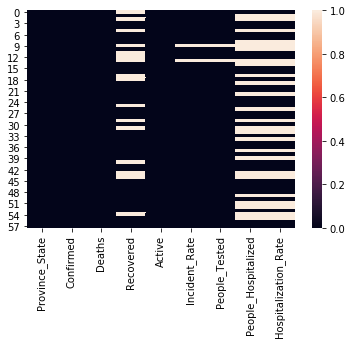

In [12]:
sns.heatmap(df.isnull())

In [13]:
df.isnull().sum()

Province_State           0
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Hospitalization_Rate    25
dtype: int64

NAN values are present in
1. Recovered
2. Incident_Rate
3. People_Tested
4. People_Hospitalized
5. Mortality_Rate
6. Testing_Rate
7. Hospitalization_Rate

# Removing NAN values

In [14]:
# Dropping People_Hospitalized and Hospitalization_Rate as it has around 50% NaN values

df = df.drop(["Hospitalization_Rate", "People_Hospitalized" ] , axis = 1)

In [15]:
# Replacing NAN

df["Recovered"] = df["Recovered"].replace(np.nan,df["Recovered"].mean())
df["Incident_Rate"] = df["Incident_Rate"].replace(np.nan,df["Incident_Rate"].mean())
df["People_Tested"] = df["People_Tested"].replace(np.nan,df["People_Tested"].mean())

#Replaces NAN in Item_Weight with mode value

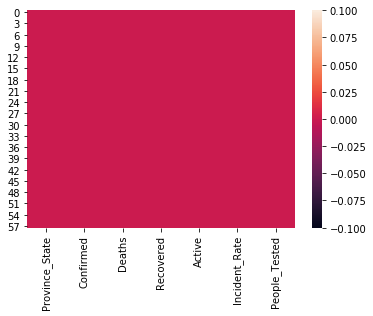

In [16]:
sns.heatmap(df.isnull())

All Nan Values have been removed

# Checking for ?

In [17]:
(df == '?').sum()

Province_State    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
Incident_Rate     0
People_Tested     0
dtype: int64

# Label Encoder

In [18]:
df.head()

,Province_State,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested
0,Alabama,13052,522,7007.428571,12530,266.194321,164450.0
1,Alaska,401,10,352.000000,39,54.815493,37045.0
2,American Samoa,0,0,7007.428571,0,0.000000,124.0
3,Arizona,14906,747,3773.000000,10386,204.788838,165435.0
4,Arkansas,5003,107,3852.000000,1044,165.782801,96258.0


In [19]:
# Converting non numeric data to numeric for data analysis

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Province_State'] = le.fit_transform(df['Province_State'].astype(str))


In [20]:
df.head()

,Province_State,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested
0,0,13052,522,7007.428571,12530,266.194321,164450.0
1,1,401,10,352.000000,39,54.815493,37045.0
2,2,0,0,7007.428571,0,0.000000,124.0
3,3,14906,747,3773.000000,10386,204.788838,165435.0
4,4,5003,107,3852.000000,1044,165.782801,96258.0


# Univarient Analysis

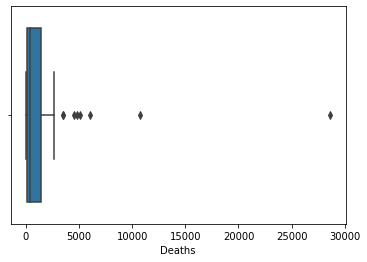

In [21]:
sns.boxplot(df["Deaths"])

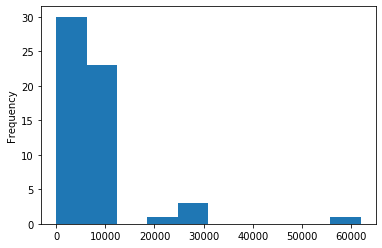

In [22]:
df["Recovered"].plot.hist()

# Bivarient Analysis

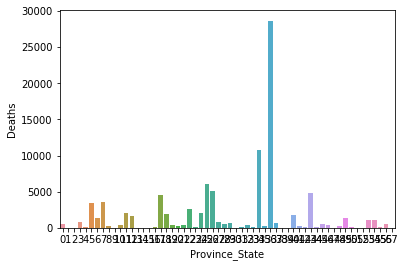

In [23]:
# IT is clearly visible the deaths are highest in only 2 provinces

sns.barplot(x=df['Province_State'], y=df['Deaths'],data=df)
plt.show()

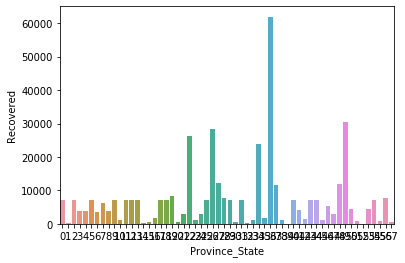

In [24]:
# Number of recovered are more in few states but it need to be compared to infected count

sns.barplot(x=df['Province_State'], y=df['Recovered'],data=df)
plt.show()

# Multi Varient Analysis

In [25]:
df.columns

Index(['Province_State', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Incident_Rate', 'People_Tested'],
      dtype='object')

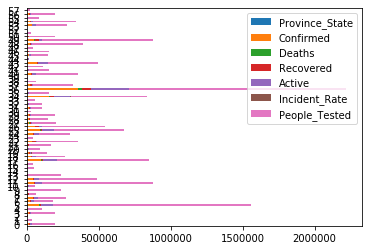

In [26]:
df.plot.barh(stacked = True)

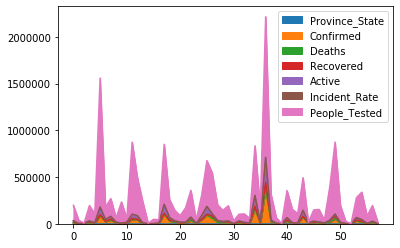

In [27]:
df.plot.area()

Observations
1. No. of Recovered is less as compared to Deaths
2. % of Active is less i.e. either they recovered or died
3. Rate at which people are tested is high 

# Correlation

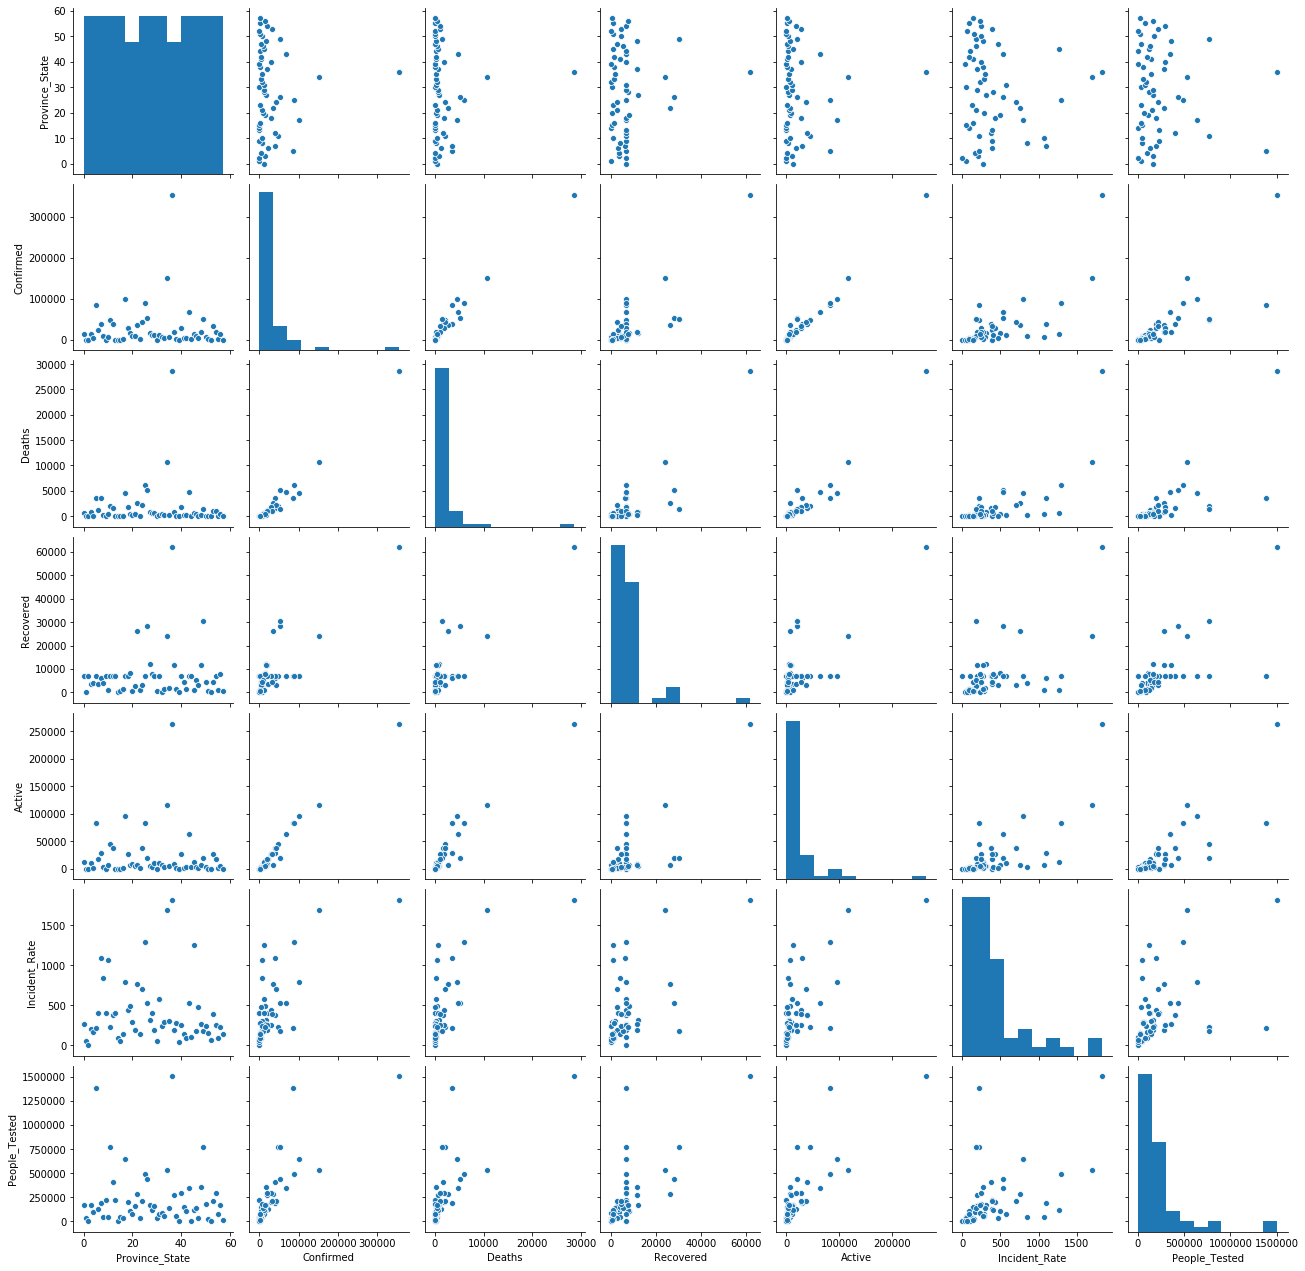

In [28]:
sns.pairplot(df)

In [29]:
df.corr()

,Province_State,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested
Province_State,1.000000,0.006490,0.015229,0.067595,-0.027612,-0.078280,-0.065428
Confirmed,0.006490,1.000000,0.982191,0.822547,0.985218,0.708436,0.824136
Deaths,0.015229,0.982191,1.000000,0.830223,0.954378,0.710105,0.739634
Recovered,0.067595,0.822547,0.830223,1.000000,0.725085,0.542795,0.711255
Active,-0.027612,0.985218,0.954378,0.725085,1.000000,0.700926,0.826144
Incident_Rate,-0.078280,0.708436,0.710105,0.542795,0.700926,1.000000,0.441669
People_Tested,-0.065428,0.824136,0.739634,0.711255,0.826144,0.441669,1.000000


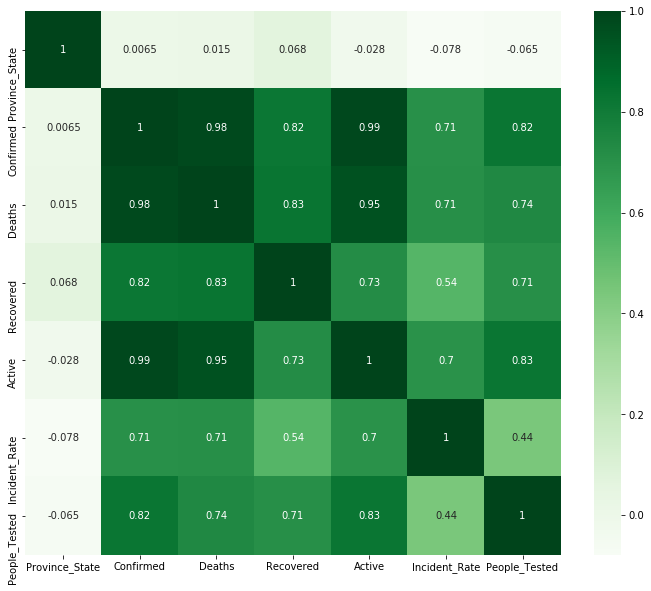

In [30]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr() ,  cmap = "Greens" , annot = True)

Observations:
    1. Confirmed is more positively related to deaths than recovered

# Checking out Outliers and removing

In [31]:
col_list = df.columns.values

ncols = 5
nrows = 12

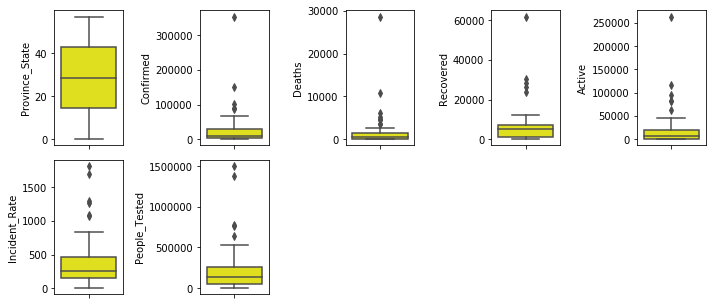

In [32]:

plt.figure(figsize = (2*ncols, 5*ncols))
for i in range( 0 , len(col_list)):
    plt.subplot(nrows , ncols , i+1)
    sns.boxplot(df[col_list[i]] , color = 'yellow' , orient = 'v')
    plt.tight_layout()

Outliers Present

In [33]:
from scipy.stats import zscore


z = np.abs(zscore(df))

df_new = df[(z<3).all(axis = 1) ]

df_new

,Province_State,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested
0,0,13052,522,7007.428571,12530,266.194321,164450.000000
1,1,401,10,352.000000,39,54.815493,37045.000000
2,2,0,0,7007.428571,0,0.000000,124.000000
3,3,14906,747,3773.000000,10386,204.788838,165435.000000
4,4,5003,107,3852.000000,1044,165.782801,96258.000000
6,6,22797,1299,3478.000000,18020,395.868121,131837.000000
7,7,39017,3529,6264.000000,29224,1094.357902,190718.000000
8,8,8194,310,3965.000000,3919,841.476990,45412.000000
9,9,49,0,7007.428571,49,396.230806,225853.410714
10,10,7551,407,1059.000000,6085,1069.927127,40419.000000


In [34]:
df.shape

(58, 7)

In [35]:
df_new.shape

(55, 7)

3 rows have been removed to remove the outliers from the data set

# Splitting in to Attributes and Target variables

We shall consider Deaths as the target variable

In [53]:
x = df.drop (["Deaths"] , axis = 1)

x

,Province_State,Confirmed,Recovered,Active,Incident_Rate,People_Tested
0,0,13052,7007.428571,12530,266.194321,1.644500e+05
1,1,401,352.000000,39,54.815493,3.704500e+04
2,2,0,7007.428571,0,0.000000,1.240000e+02
3,3,14906,3773.000000,10386,204.788838,1.654350e+05
4,4,5003,3852.000000,1044,165.782801,9.625800e+04
5,5,85997,7007.428571,82500,217.646575,1.380120e+06
6,6,22797,3478.000000,18020,395.868121,1.318370e+05
7,7,39017,6264.000000,29224,1094.357902,1.907180e+05
8,8,8194,3965.000000,3919,841.476990,4.541200e+04
9,9,49,7007.428571,49,396.230806,2.258534e+05


In [37]:
y = df["Deaths"]

y

0       522
1        10
2         0
3       747
4       107
5      3497
6      1299
7      3529
8       310
9         0
10      407
11     2096
12     1697
13        3
14        5
15       17
16       77
17     4525
18     1864
19      393
20      202
21      376
22     2608
23       73
24     2123
25     6066
26     5060
27      786
28      570
29      640
30       16
31      138
32      377
33      190
34    10749
35      283
36    28636
37      726
38       49
39        2
40     1781
41      299
42      144
43     4770
44      125
45      538
46      407
47       46
48      305
49     1426
50       90
51       54
52        6
53     1075
54     1037
55       69
56      481
57       11
Name: Deaths, dtype: int64

In [38]:
y = y.values.reshape(-1,1)

y.shape , x.shape

((58, 1), (58, 6))

# Checking Skewness

In [39]:
x.skew()

Province_State    0.000000
Confirmed         4.708614
Recovered         3.647693
Active            4.180953
Incident_Rate     1.988351
People_Tested     2.829700
dtype: float64

In [40]:
# Reducing Skewness using squareroot method of numpy
x1 = x

for col in x1.columns:
    if x1.skew().loc[col]>0.55:
        x1[col] = np.sqrt(x1[col])[0]

In [41]:
x1.skew()

Province_State    0.0
Confirmed         0.0
Recovered         0.0
Active            0.0
Incident_Rate     0.0
People_Tested     0.0
dtype: float64

# Scaling x

In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x2 = sc.fit_transform(x1)
x2 = pd.DataFrame(x2,columns = x1.columns)
x2

# Using x as skewness isnt gettting removed

,Province_State,Confirmed,Recovered,Active,Incident_Rate,People_Tested
0,-1.702441,-1.0,-1.0,-1.0,0.0,-1.0
1,-1.642706,-1.0,-1.0,-1.0,0.0,-1.0
2,-1.582971,-1.0,-1.0,-1.0,0.0,-1.0
3,-1.523237,-1.0,-1.0,-1.0,0.0,-1.0
4,-1.463502,-1.0,-1.0,-1.0,0.0,-1.0
5,-1.403767,-1.0,-1.0,-1.0,0.0,-1.0
6,-1.344032,-1.0,-1.0,-1.0,0.0,-1.0
7,-1.284298,-1.0,-1.0,-1.0,0.0,-1.0
8,-1.224563,-1.0,-1.0,-1.0,0.0,-1.0
9,-1.164828,-1.0,-1.0,-1.0,0.0,-1.0


In [43]:
x2.skew()

Province_State    0.0
Confirmed         0.0
Recovered         0.0
Active            0.0
Incident_Rate     0.0
People_Tested     0.0
dtype: float64

# Data Analysis - Linear Regression Model

In [44]:
from sklearn.model_selection import train_test_split, cross_val_score

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [46]:
lreg = LinearRegression()
knr = KNeighborsRegressor()
ls = Lasso()
en = ElasticNet()
dtr = DecisionTreeRegressor()

In [54]:
# Best Model we consider is KNeighborsRegressor as it has highest R2Score

max_r2 = 0

for rs in range(30,101):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = rs , test_size = 0.20)
    knr.fit(x_train,y_train)
    pred=knr.predict(x_test)
    r2s = r2_score(y_test,pred)
    if r2s > max_r2:
        max_r2 = r2s
        final_rm = rs
        print("Max R2 Score : " , max_r2 , "Max Random State" , final_rm)


Max R2 Score :  0.4504795340189398 Max Random State 30
Max R2 Score :  0.48264749586567945 Max Random State 33
Max R2 Score :  0.5017870844883998 Max Random State 38
Max R2 Score :  0.6080583627320677 Max Random State 40
Max R2 Score :  0.7137673765617981 Max Random State 46
Max R2 Score :  0.725787995501066 Max Random State 51
Max R2 Score :  0.9143595775352177 Max Random State 59
Max R2 Score :  0.9230008598548878 Max Random State 71


Please note we are geeting best result by using x without removing skewnesss and without scaling.
hence we shall use x for selecting the model

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 71 , test_size = 0.20)

x_train.shape ,x_test.shape,y_train.shape,y_test.shape

((46, 6), (12, 6), (46, 1), (12, 1))

In [56]:
#Best parameter for Linear Regression

parameters = { 'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
gs = GridSearchCV(lreg , parameters )
gs.fit(x_train,y_train)
gs.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [57]:
#Best parameter for KNearestNeighbors

parameters = { 'n_neighbors' : (1,10)}
gs = GridSearchCV(knr , parameters )
gs.fit(x_train,y_train)
gs.best_params_

{'n_neighbors': 10}

In [58]:
#Best parameter for Decision Tree

parameters = { "criterion": ["mse", "mae"] }
gs = GridSearchCV(dtr , parameters )
gs.fit(x_train,y_train)
gs.best_params_

{'criterion': 'mae'}

In [59]:
lreg = LinearRegression(copy_X = 'True' , fit_intercept = 'True' , normalize = 'True')
knr = KNeighborsRegressor(n_neighbors= 10)
dtr = DecisionTreeRegressor(criterion = 'mae')
svr = SVR()

In [60]:
# Best Parameter for Random Forest

rf = RandomForestRegressor()
parameters = {  "n_estimators" : [10 , 100 , 500 , 1000]}
gs = GridSearchCV(rf , parameters , cv =5)
gs.fit(x_train,y_train)
gs.best_params_


{'n_estimators': 100}

In [61]:
# Best Parameter for Gradient Boosting

gbr = GradientBoostingRegressor()
parameters = { "learning_rate" : [0.001 , 0.01 , 0.1 , 1] , "n_estimators" : [10 , 100 , 500 , 1000]}
gs = GridSearchCV(gbr , parameters , cv =5)
gs.fit(x_train,y_train)
gs.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [62]:
gbr = GradientBoostingRegressor(learning_rate = 0.1 ,n_estimators = 500 )
rf = RandomForestRegressor(n_estimators = 100)

In [63]:
models = []
models.append(('KNeighborsRegressor' , knr))
models.append(('LinearRegression' , lreg))
models.append(('Lasso' , ls))
models.append(('ElasticNet' , en))
models.append(('GradientBooster' , gbr))
models.append(('RandomForestRegressor' , rf))
models.append(('SVR' , svr))

models

[('KNeighborsRegressor',
  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                      weights='uniform')),
 ('LinearRegression',
  LinearRegression(copy_X='True', fit_intercept='True', n_jobs=None,
                   normalize='True')),
 ('Lasso',
  Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
        normalize=False, positive=False, precompute=False, random_state=None,
        selection='cyclic', tol=0.0001, warm_start=False)),
 ('ElasticNet',
  ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
             max_iter=1000, normalize=False, positive=False, precompute=False,
             random_state=None, selection='cyclic', tol=0.0001, warm_start=False)),
 ('GradientBooster',
  GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                            init=None, learning_rate=0.1, loss='ls', max_depth=3,
   

In [64]:
Model = []
r2score = []
cv = []
rmse = []

for name,model in models:
    print("***************************" , name , "***************************\n")
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred = model.predict(x_test)
    print("\n")
    r2s = r2_score(y_test,pred)
    print("r2 score :" , r2s)
    r2score.append(r2s*100)
    print("\n")
    sc = cross_val_score(model , x, y , cv = 10 , scoring = 'r2')
    print("Cross_Val_score : " , sc)
    cv.append(sc*100)
    print("\n")
    rme = np.sqrt(mean_squared_error(y_test,pred))
    print("RMSE : " , rme)
    rmse.append(rme)
    print("\n\n")
    

*************************** KNeighborsRegressor ***************************

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')


r2 score : 0.6971302974151625


Cross_Val_score :  [-0.02121695 -0.25089455  0.71304361  0.65147488  0.39030937  0.33096642
  0.07914578  0.62399093 -6.02114425  0.45012198]


RMSE :  883.56323203266



*************************** LinearRegression ***************************

LinearRegression(copy_X='True', fit_intercept='True', n_jobs=None,
                 normalize='True')


r2 score : 0.9343231899480071


Cross_Val_score :  [ 0.87990868  0.71094511  0.63224497  0.85486004  0.91817823  0.98250926
  0.96891889  0.97656769 -3.51540721 -0.46832782]


RMSE :  411.44874786510366



*************************** Lasso ***************************

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False

In [65]:
result = pd.DataFrame({'Model' : Model , 'R2Score' : r2score , "RMSE" : rmse , "Cross_Val_Score" :cv})

result

,Model,R2Score,RMSE,Cross_Val_Score
0,KNeighborsRegressor,69.713030,883.563232,"[-2.121695447471872, -25.08945485929539, 71.30..."
1,LinearRegression,93.432319,411.448748,"[87.99086793039949, 71.09451080782918, 63.2244..."
2,Lasso,93.565876,407.243754,"[87.8702315984675, 71.09238435112192, 63.16963..."
3,ElasticNet,93.571405,407.068749,"[87.87535609383126, 71.08683926885433, 63.1705..."
4,GradientBooster,81.012034,699.598617,"[-254.03624825545128, 76.94360347710499, 97.31..."
5,RandomForestRegressor,96.360099,306.305299,"[-148.70877958306772, 74.89494027920576, 96.31..."
6,SVR,-20.927658,1765.519591,"[-11.520855891411784, -52.63657481207946, -14...."


In [66]:
# Best Model we consider is Random Forest as it has highest R2Score

max_r2 = 0

for rs in range(30,101):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = rs , test_size = 0.20)
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    r2s = r2_score(y_test,pred)
    if r2s > max_r2:
        max_r2 = r2s
        final_rm = rs
        print("Max R2 Score : " , max_r2 , "Max Random State" , final_rm)


Max R2 Score :  0.6922804749508115 Max Random State 30
Max R2 Score :  0.8197304172281983 Max Random State 34
Max R2 Score :  0.8352874599751232 Max Random State 36
Max R2 Score :  0.8831551032391605 Max Random State 38
Max R2 Score :  0.9656635327697128 Max Random State 40
Max R2 Score :  0.9666887664643136 Max Random State 59


In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 59 , test_size = 0.20)

rf.fit(x_train,y_train)
pred=rf.predict(x_test)
R2Score= r2_score(y_test,pred)

print("R2Score : " , R2Score)


R2Score :  0.9686958651122497


# Predicting the values

In [76]:
# Random Forestmodel as it has comapratively better r2score

df_pred = rf.predict(x_test)

df_predict = pd.DataFrame(df_pred)

df_predict

,0
0,5060.98
1,364.26
2,339.41
3,1579.54
4,87.15
5,77.61
6,169.36
7,473.38
8,11.82
9,66.10


# Saving the model

In [77]:
from sklearn.externals import joblib

# Save the model as a object file

joblib.dump(rf , 'p9_covid19.obj')

#Load the model from the file

dtc_from_joblib = joblib.load('p9_covid19.obj')

# Use the loaded model to make predictions

dtc_from_joblib.predict(x_test)

array([5060.98,  364.26,  339.41, 1579.54,   87.15,   77.61,  169.36,
        473.38,   11.82,   66.1 ,  911.82,   14.02])

In [78]:
# Saving Predict to csv

df_predict.to_csv("C:/Users/drash/OneDrive/Desktop/PythonSQL/covid19_predict.csv")